# STEP 1: IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# STEP 2: Load Dataset

In [3]:
df = pd.read_csv("./Datasets/Boston_housing.csv")

# STEP 3: Basic EDA

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing_count": missing,
    "Missing Percentage": missing_percentage
})

print(missing_df[missing_df["Missing_count"] > 0])

       Missing_count  Missing Percentage
CRIM              20            3.952569
ZN                20            3.952569
INDUS             20            3.952569
CHAS              20            3.952569
AGE               20            3.952569
LSTAT             20            3.952569


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
# select numerical value

numerical_value = df.select_dtypes(include=('float64', 'int64'))
numerical_value.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [11]:
numerical_value.shape

(506, 14)

In [12]:
# Correlation with Target
correlation = df.corr()['MEDV'].sort_values(ascending=False)
print(correlation)

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


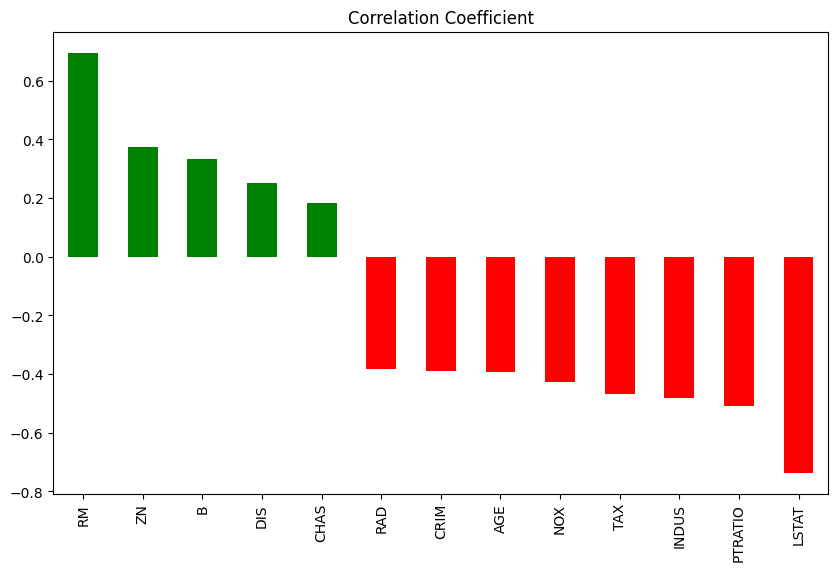

In [13]:
plt.figure(figsize=(10,6))
correlation.drop('MEDV').plot(kind='bar', color=['green' if x > 0 else 'red' for x in correlation.drop('MEDV')])
plt.title("Correlation with MEDV")
plt.title('Correlation Coefficient')
plt.show()

# STEP 4: Handle Missing Values

In [14]:
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing_count": missing,
    "Missing Percentage": missing_percentage
})

print(missing_df[missing_df["Missing_count"] > 0])

       Missing_count  Missing Percentage
CRIM              20            3.952569
ZN                20            3.952569
INDUS             20            3.952569
CHAS              20            3.952569
AGE               20            3.952569
LSTAT             20            3.952569


# STEP 5: Handle Missing Values

In [15]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [16]:
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing_count": missing,
    "Missing Percentage": missing_percentage
})

print(missing_df[missing_df["Missing_count"] > 0])

Empty DataFrame
Columns: [Missing_count, Missing Percentage]
Index: []


# STEP 6: Feature Selection/Preprocessing


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [18]:
X = df.drop(["MEDV"], axis=1, errors='ignore')
y = df["MEDV"]

In [19]:
X.shape

(506, 13)

In [20]:
y.shape

(506,)

# STEP 7: Train/Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [23]:
X_train.shape

(404, 13)

In [24]:
X_test.shape

(102, 13)

# STEP 8: Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# STEP 9: RANDOM FOREST WITH DEFAULT PARAMETERS

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaler, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
model.score(X_test_scaler, y_test)

0.8874973220437937

In [30]:
y_pred = model.predict(X_test_scaler)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")

Mean Squared Error: 8.250246990196079
Mean Absolute Error: 2.0667941176470586
R2 Score: 0.8874973220437937
RMSE: 2.8723243184215947


# STEP 10: CROSS-VALIDATION

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"CV R2 Scores: {cv_score}")
print(f"Mean CV R²: {cv_score.mean():.4f} (+/- {cv_score.std():.4f})")


CV R2 Scores: [0.83811664 0.72541763 0.85249059 0.82320291 0.79559018]
Mean CV R²: 0.8070 (+/- 0.0449)


# STEP 11: FEATURE IMPORTANCE ANALYSIS


--- Feature Importance Ranking ---
    Feature  Importance
5        RM    0.560640
12    LSTAT    0.243393
7       DIS    0.060263
0      CRIM    0.043646
10  PTRATIO    0.018016
9       TAX    0.016965
4       NOX    0.016219
6       AGE    0.013350
11        B    0.013335
2     INDUS    0.006537
8       RAD    0.004731
1        ZN    0.001730
3      CHAS    0.001176

Top 5 Most Important Features:
Feature  Importance
     RM    0.560640
  LSTAT    0.243393
    DIS    0.060263
   CRIM    0.043646
PTRATIO    0.018016


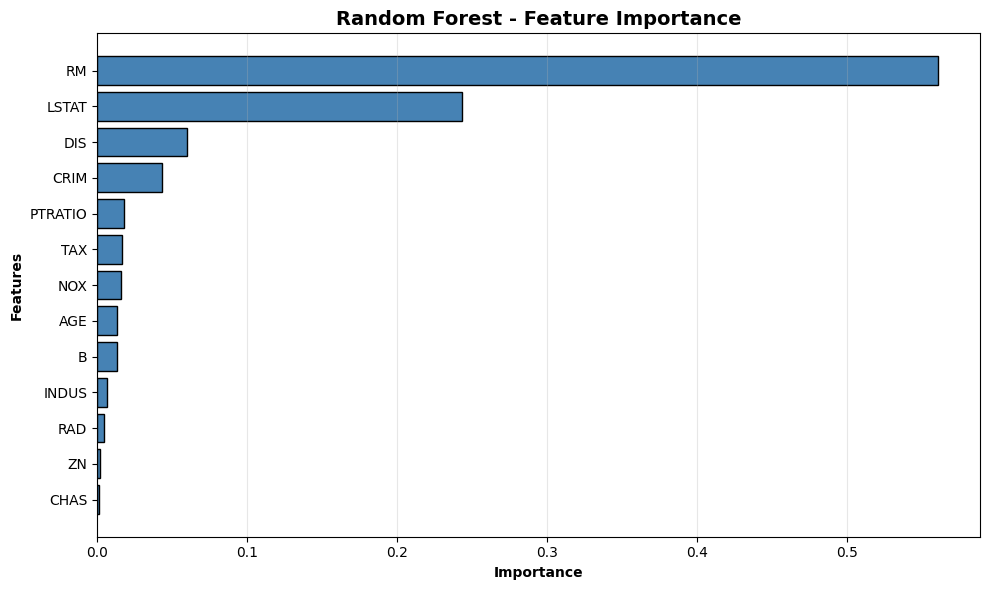

In [35]:
# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n--- Feature Importance Ranking ---")
print(feature_importance)

print("\nTop 5 Most Important Features:")
print(feature_importance.head(5).to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue', edgecolor='black')
plt.xlabel('Importance', fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.title('Random Forest - Feature Importance', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


# STEP 12: HYPERPARAMETER TUNING WITH GRIDSEARCHCV

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Define Parameter Grid

param_grid = {
    'n_estimators': [100,200,300],          # Number of Trees
    'max_depth': [10,20,30, None],          # Maximum Depth of trees
    'min_samples_split': [2,5,10],          # Minimum Sample to split
    'min_samples_leaf': [1,2,4],            # Minimum sample per leaf
    'max_features': ['sqrt', 'log2']        # Feature to consider at each split
}

print(f"\nTesting {len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * len(param_grid['max_features'])} combinations...")

# Create GridSearchCV

grid_search = GridSearchCV(
    estimator = RandomForestRegressor(random_state=42),
    param_grid = param_grid,
    cv=5,
    scoring='r2',
    verbose=1, 
    n_jobs=-1
)

# Fit GrifSearchSCV
grid_search.fit(X_train, y_train)

# Best Parameters
print(f"Best n_estimators: {grid_search.best_params_['n_estimators']}")
print(f"Best Max Depth: {grid_search.best_params_['max_depth']}")
print(f"Best min_samples_split: {grid_search.best_params_['min_samples_split']}")
print(f"Best min_samples_leaf: {grid_search.best_params_['min_samples_leaf']}")
print(f"Best max_features: {grid_search.best_params_['max_features']}")
print(f"Best CV R² Score: {grid_search.best_score_:.4f}")


Testing 216 combinations...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best n_estimators: 300
Best Max Depth: 10
Best min_samples_split: 2
Best min_samples_leaf: 1
Best max_features: sqrt
Best CV R² Score: 0.8315


In [38]:
# predict With Best Model
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

tuned_r2 = r2_score(y_test, y_pred_tuned)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print("--- Tuned Model performance(Test Set) ---")
print(f"R2 score: {tuned_r2:.4f}")
print(f"Mean Absolute Error: {tuned_mae:.4f}")
print(f"RMSE: {tuned_rmse:.4f}")

--- Tuned Model performance(Test Set) ---
R2 score: 0.8524
Mean Absolute Error: 2.0279
RMSE: 3.2894


# STEP 13: RANDOMIZED SEARCH (ALTERNATIVE - FASTER)

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [46]:
# Define parameter distributions for RandomizedSearch

param_dist = {
    'n_estimators': [100,200,300,500],
    'max_depth': [10,20,30,40, None],
    'min_samples_split': randint(2,20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

print("\nRunning RandomizedSearchCV (20 Iteration)")

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20, # number of random combination to try
    cv=5,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("\n--- Best Parameters (RandomizedSearch) ---")
print(f"Best CV R2 Score: {random_search.best_score_:.4f}")
print(f"Best Parameters: {random_search.best_params_}")


Running RandomizedSearchCV (20 Iteration)
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- Best Parameters (RandomizedSearch) ---
Best CV R2 Score: 0.8150
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 500}


# STEP 14: MODEL COMPARISON

In [48]:
comparison = pd.DataFrame({
    'Model': ['RF (Default)', 'RF (GridSearch)', 'RF (RandomSearch)'],
    'R2 Score': [
        r2,
        tuned_r2,
        r2_score(y_test, random_search.best_estimator_.predict(X_test))
    ],
    'MAE ($k)': [
        mae,
        tuned_mae,
        mean_absolute_error(y_test, random_search.best_estimator_.predict(X_test))
    ],
    'RMSE ($k)': [
        rmse, 
        tuned_rmse, 
        np.sqrt(mean_squared_error(y_test, random_search.best_estimator_.predict(X_test)))
    ]
})

print("\n")
print(comparison.to_string(index=False))

best_idx = comparison['R2 Score'].idxmax()
print(f"Best Model: {comparison.loc[best_idx, 'Model']}")

improvement = ((tuned_r2 - r2) / r2) * 100
print(f"Improvement From Tuning: {improvement:.2f}%")



            Model  R2 Score  MAE ($k)  RMSE ($k)
     RF (Default)  0.887497  2.066794   2.872324
  RF (GridSearch)  0.852449  2.027912   3.289444
RF (RandomSearch)  0.835597  2.109032   3.472214
Best Model: RF (Default)
Improvement From Tuning: -3.95%
